In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Corona_NLP_test.csv")

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [4]:
corpus = df["OriginalTweet"]

In [5]:
corpus = list(corpus)

In [6]:
len(corpus)

3798

In [7]:
import nltk
from nltk.corpus import stopwords
import string


# Load the stopwords
stop_words = set(stopwords.words('english'))

# Define a function to tokenize the tweets
def tokenize_tweet(tweet):
    # Remove special characters
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the tweet
    tokens = nltk.word_tokenize(tweet.lower())
    # Remove the stop words and words starting with 'htt'
    filtered_tokens = [token for token in tokens if token not in stop_words and not token.startswith('htt')]
    return filtered_tokens

# Tokenize all the tweets
tokenized_tweets = [tokenize_tweet(tweet) for tweet in corpus]


In [8]:
tokenized_tweets

[['trending',
  'new',
  'yorkers',
  'encounter',
  'empty',
  'supermarket',
  'shelves',
  'pictured',
  'wegmans',
  'brooklyn',
  'soldout',
  'online',
  'grocers',
  'foodkick',
  'maxdelivery',
  'coronavirusfearing',
  'shoppers',
  'stock'],
 ['couldnt',
  'find',
  'hand',
  'sanitizer',
  'fred',
  'meyer',
  'turned',
  'amazon',
  '11497',
  '2',
  'pack',
  'purellcheck',
  'coronavirus',
  'concerns',
  'driving',
  'prices'],
 ['find', 'protect', 'loved', 'ones', 'coronavirus'],
 ['panic',
  'buying',
  'hits',
  'newyork',
  'city',
  'anxious',
  'shoppers',
  'stock',
  'foodampmedical',
  'supplies',
  'healthcare',
  'worker',
  '30s',
  'becomes',
  'bigapple',
  '1st',
  'confirmed',
  'coronavirus',
  'patient',
  'bloomberg',
  'staged',
  'event',
  'qanon',
  'qanon2018',
  'qanon2020',
  'election2020',
  'cdc'],
 ['toiletpaper',
  'dunnypaper',
  'coronavirus',
  'coronavirusaustralia',
  'coronavirusupdate',
  'covid19',
  '9news',
  'corvid19',
  '7newsm

In [9]:
word_freq = {}
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in word_freq.keys():
            word_freq[word]=1
        else:
            word_freq[word]+=1

In [10]:
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

In [11]:
sorted_word_freq

{'covid19': 2492,
 'coronavirus': 1509,
 'food': 1328,
 'store': 1008,
 'grocery': 815,
 'stock': 778,
 'people': 774,
 'amp': 577,
 'shopping': 522,
 'supermarket': 513,
 'online': 508,
 'panic': 481,
 'prices': 431,
 'need': 366,
 'toilet': 361,
 'paper': 350,
 'like': 332,
 'get': 327,
 'buying': 287,
 'go': 259,
 'going': 256,
 'us': 252,
 'local': 245,
 'please': 245,
 'retail': 236,
 'time': 227,
 'home': 225,
 'coronaviruspandemic': 218,
 'shelves': 212,
 'buy': 211,
 'stores': 204,
 'everyone': 199,
 'work': 196,
 'due': 194,
 'today': 193,
 'help': 188,
 'consumer': 185,
 'covid2019': 178,
 'demand': 163,
 'supplies': 162,
 'coronaoutbreak': 158,
 'one': 153,
 'virus': 152,
 'dont': 151,
 'don\x92t': 148,
 'pandemic': 147,
 '2': 146,
 'stay': 143,
 '19': 143,
 'hand': 140,
 'water': 138,
 'covid': 138,
 'even': 137,
 'empty': 133,
 'panicbuying': 133,
 'still': 133,
 'coronapocalypse': 133,
 'many': 128,
 'would': 128,
 'went': 127,
 'know': 127,
 'it\x92s': 126,
 'think': 126

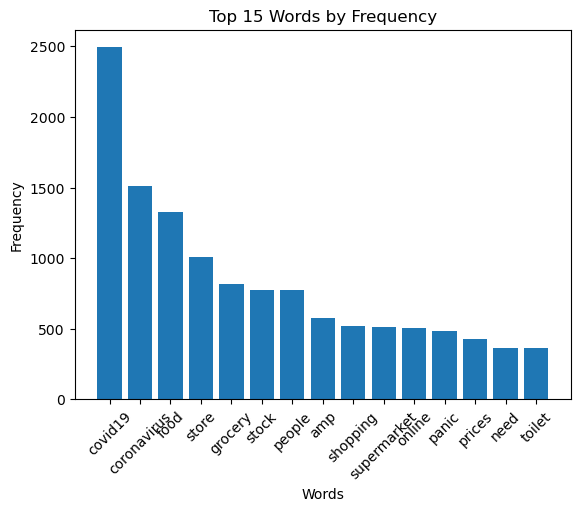

In [12]:
import matplotlib.pyplot as plt

# Assuming you have a sorted dictionary of word frequencies named 'sorted_word_freq'
# and you want to plot the top 15 words in a bar graph
top_words = list(sorted_word_freq.keys())[:15]
word_counts = list(sorted_word_freq.values())[:15]

# Create the bar graph
plt.bar(top_words, word_counts)
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words by Frequency')

# Show the plot
plt.show()


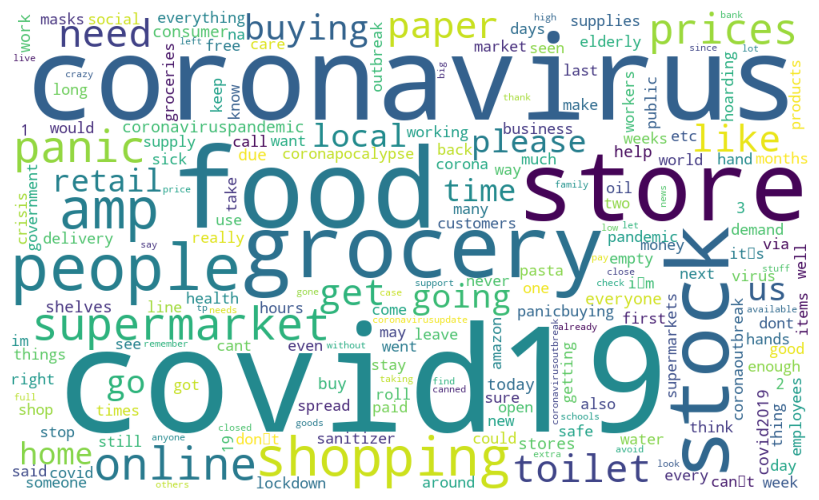

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a sorted dictionary of word frequencies named 'word_freq'
# and you want to generate a word cloud for the top 200 words
word_freq_top200 = dict(list(sorted_word_freq.items())[:200])

# Generate the word cloud
wordcloud = WordCloud(width = 1000, height = 600, background_color ='white', 
                      stopwords = set(stopwords.words('english')), 
                      min_font_size = 8).generate_from_frequencies(word_freq_top200)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()